In [7]:
import pandas as pd
import pickle 
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet 
import matplotlib.pyplot as plt
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,precision_score,classification_report,ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahmedsaid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ahmedsaid/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ahmedsaid/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [11]:
false=pd.read_csv('fake.csv')
true=pd.read_csv('true.csv')

In [12]:
false.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [13]:
true['Dectection']=True

In [14]:
true.head()

,title,text,subject,date,Dectection
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [15]:
false['Dectection']=False
false.head()

,title,text,subject,date,Dectection
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",False
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",False
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",False
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",False
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",False


In [16]:
df=pd.concat(objs=[true,false])

In [17]:
df=df.sample(frac=1)

In [18]:
df.head()

,title,text,subject,date,Dectection
20485,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,They preyed on the poor in Latin America. They...,left-news,"Jun 2, 2016",False
7700,97-Year-Old Woman Dies After Being Evicted Fr...,"Marie Hatch, a 97-year-old California resident...",News,"March 4, 2016",False
9768,Trump's Washington foreign policy speech,(Reuters) - U.S. Republican presidential front...,politicsNews,"April 27, 2016",True
9165,Trump says Florida massacre proves he's right ...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"June 12, 2016",True
16826,ANGELINA JOLIE HUMILIATED Barack Obama On Worl...,It s good to know there are a few Hollywood ce...,Government News,"Jan 18, 2016",False


In [19]:
df.head(-5)

,title,text,subject,date,Dectection
20485,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,They preyed on the poor in Latin America. They...,left-news,"Jun 2, 2016",False
7700,97-Year-Old Woman Dies After Being Evicted Fr...,"Marie Hatch, a 97-year-old California resident...",News,"March 4, 2016",False
9768,Trump's Washington foreign policy speech,(Reuters) - U.S. Republican presidential front...,politicsNews,"April 27, 2016",True
9165,Trump says Florida massacre proves he's right ...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"June 12, 2016",True
16826,ANGELINA JOLIE HUMILIATED Barack Obama On Worl...,It s good to know there are a few Hollywood ce...,Government News,"Jan 18, 2016",False
...,...,...,...,...,...
14375,"Australia, NZ officials discuss screening for ...",WELLINGTON (Reuters) - New Zealand and Austral...,worldnews,"November 20, 2017",True
16369,BREAKING: A HUGE DEAL! Putin Suspends Nuclear ...,The Obama administration has done everything ...,Government News,"Oct 3, 2016",False
14805,Venezuela opposition says talks with governmen...,CARACAS (Reuters) - Venezuela s opposition sai...,worldnews,"November 14, 2017",True
1356,WATCH: Trump Embarrasses America By Throwing ...,Just remember this the next time we need help ...,News,"May 25, 2017",False


In [20]:
df.info

<bound method DataFrame.info of                                                    title  \
20485  BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...   
7700    97-Year-Old Woman Dies After Being Evicted Fr...   
9768            Trump's Washington foreign policy speech   
9165   Trump says Florida massacre proves he's right ...   
16826  ANGELINA JOLIE HUMILIATED Barack Obama On Worl...   
...                                                  ...   
15583  THE STATE THAT GETS MORE REFUGEES THAN ANY OTH...   
18875  'Rain begins with a single drop:' Saudi women ...   
5370    George Harrison Reaches Out From The Grave (S...   
1970    WATCH: Lindsey Graham LAYS INTO Devin Nunes –...   
8185   U.S. tech firms urge Congress to allow interne...   

                                                    text          subject  \
20485  They preyed on the poor in Latin America. They...        left-news   
7700   Marie Hatch, a 97-year-old California resident...             News   
9768   (Reuters)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 20485 to 8185
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44898 non-null  object
 1   text        44898 non-null  object
 2   subject     44898 non-null  object
 3   date        44898 non-null  object
 4   Dectection  44898 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 1.8+ MB


In [22]:
df.isna().sum()

title         0
text          0
subject       0
date          0
Dectection    0
dtype: int64

In [23]:
df['Dectection'].value_counts()

Dectection
False    23481
True     21417
Name: count, dtype: int64

In [24]:
df['subject'].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [25]:
df['subject'].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [26]:
df.columns

Index(['title', 'text', 'subject', 'date', 'Dectection'], dtype='object')

In [27]:
df.title.value_counts()

title
Factbox: Trump fills top jobs for his administration                                                     14
Highlights: The Trump presidency on April 13 at 9:30 P.M. EDT/0130 GMT on Friday                          8
Factbox: Contenders for senior jobs in Trump's administration                                             8
MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead     6
Factbox: International reaction to arrest of Reuters reporters in Myanmar                                 6
                                                                                                         ..
Green Party's Stein files in Pennsylvania for recount in presidential vote: Politico                      1
 ‘The Fuse Is Lit’: Legendary News Anchor Dan Rather Says Trump-Russia Scandal Is About To EXPLODE        1
Judge delays NJ Senator Menendez's dismissal bid, trial set for September 6                               1
Clinton calls for U.S.

In [28]:
df.text.value_counts()

text
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [29]:
def make_lower(a_string):
    return a_string.lower()
def remove_punctuation(a_string):
    a_string=re.sub(r'[^\w\s]','',a_string)
    return a_string
def remove_bad_characters(a_string):
    new_string=re.sub('[a^-zA-Z0-0]','',a_string)
    cleaned_string=re.sub('\s+',' ',new_string)
    return cleaned_string


In [30]:
def text_pipeline(input_string):
    input_string=make_lower(input_string)
    input_string=remove_punctuation(input_string)
    return input_string

In [31]:
df.columns

Index(['title', 'text', 'subject', 'date', 'Dectection'], dtype='object')

In [32]:
df.head()

,title,text,subject,date,Dectection
20485,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,They preyed on the poor in Latin America. They...,left-news,"Jun 2, 2016",False
7700,97-Year-Old Woman Dies After Being Evicted Fr...,"Marie Hatch, a 97-year-old California resident...",News,"March 4, 2016",False
9768,Trump's Washington foreign policy speech,(Reuters) - U.S. Republican presidential front...,politicsNews,"April 27, 2016",True
9165,Trump says Florida massacre proves he's right ...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"June 12, 2016",True
16826,ANGELINA JOLIE HUMILIATED Barack Obama On Worl...,It s good to know there are a few Hollywood ce...,Government News,"Jan 18, 2016",False


In [33]:

df['title+text']=df['title']+ " "+df['text']
df['clean_title+text']=df['title+text'].apply(text_pipeline)


In [34]:
print('Oringingal title:\n', df['title+text'][0])
print('-'*100)
print('New title:\n',df['clean_title+text'][0])

Oringingal title:
 0     Donald Trump Sends Out Embarrassing New Year’...
0    As U.S. budget fight looms, Republicans flip t...
Name: title+text, dtype: object
----------------------------------------------------------------------------------------------------
New title:
 0     donald trump sends out embarrassing new years...
0    as us budget fight looms republicans flip thei...
Name: clean_title+text, dtype: object


In [35]:
df.head(5)

,title,text,subject,date,Dectection,title+text,clean_title+text
20485,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,They preyed on the poor in Latin America. They...,left-news,"Jun 2, 2016",False,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,busted hillary and bill clintons massive money...
7700,97-Year-Old Woman Dies After Being Evicted Fr...,"Marie Hatch, a 97-year-old California resident...",News,"March 4, 2016",False,97-Year-Old Woman Dies After Being Evicted Fr...,97yearold woman dies after being evicted from...
9768,Trump's Washington foreign policy speech,(Reuters) - U.S. Republican presidential front...,politicsNews,"April 27, 2016",True,Trump's Washington foreign policy speech (Reut...,trumps washington foreign policy speech reuter...
9165,Trump says Florida massacre proves he's right ...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"June 12, 2016",True,Trump says Florida massacre proves he's right ...,trump says florida massacre proves hes right o...
16826,ANGELINA JOLIE HUMILIATED Barack Obama On Worl...,It s good to know there are a few Hollywood ce...,Government News,"Jan 18, 2016",False,ANGELINA JOLIE HUMILIATED Barack Obama On Worl...,angelina jolie humiliated barack obama on worl...


In [36]:
df.head()

,title,text,subject,date,Dectection,title+text,clean_title+text
20485,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,They preyed on the poor in Latin America. They...,left-news,"Jun 2, 2016",False,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,busted hillary and bill clintons massive money...
7700,97-Year-Old Woman Dies After Being Evicted Fr...,"Marie Hatch, a 97-year-old California resident...",News,"March 4, 2016",False,97-Year-Old Woman Dies After Being Evicted Fr...,97yearold woman dies after being evicted from...
9768,Trump's Washington foreign policy speech,(Reuters) - U.S. Republican presidential front...,politicsNews,"April 27, 2016",True,Trump's Washington foreign policy speech (Reut...,trumps washington foreign policy speech reuter...
9165,Trump says Florida massacre proves he's right ...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"June 12, 2016",True,Trump says Florida massacre proves he's right ...,trump says florida massacre proves hes right o...
16826,ANGELINA JOLIE HUMILIATED Barack Obama On Worl...,It s good to know there are a few Hollywood ce...,Government News,"Jan 18, 2016",False,ANGELINA JOLIE HUMILIATED Barack Obama On Worl...,angelina jolie humiliated barack obama on worl...


In [37]:
df.subject.value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

In [38]:
columns=['subject']
df=pd.get_dummies(data=df,columns=columns,drop_first=True)
df.head()

,title,text,date,Dectection,title+text,clean_title+text,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
20485,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,They preyed on the poor in Latin America. They...,"Jun 2, 2016",False,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,busted hillary and bill clintons massive money...,False,False,False,True,False,False,False
7700,97-Year-Old Woman Dies After Being Evicted Fr...,"Marie Hatch, a 97-year-old California resident...","March 4, 2016",False,97-Year-Old Woman Dies After Being Evicted Fr...,97yearold woman dies after being evicted from...,False,True,False,False,False,False,False
9768,Trump's Washington foreign policy speech,(Reuters) - U.S. Republican presidential front...,"April 27, 2016",True,Trump's Washington foreign policy speech (Reut...,trumps washington foreign policy speech reuter...,False,False,False,False,False,True,False
9165,Trump says Florida massacre proves he's right ...,WASHINGTON (Reuters) - Republican presidential...,"June 12, 2016",True,Trump says Florida massacre proves he's right ...,trump says florida massacre proves hes right o...,False,False,False,False,False,True,False
16826,ANGELINA JOLIE HUMILIATED Barack Obama On Worl...,It s good to know there are a few Hollywood ce...,"Jan 18, 2016",False,ANGELINA JOLIE HUMILIATED Barack Obama On Worl...,angelina jolie humiliated barack obama on worl...,False,False,False,False,False,False,False


In [39]:
df

,title,text,date,Dectection,title+text,clean_title+text,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
20485,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,They preyed on the poor in Latin America. They...,"Jun 2, 2016",False,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,busted hillary and bill clintons massive money...,False,False,False,True,False,False,False
7700,97-Year-Old Woman Dies After Being Evicted Fr...,"Marie Hatch, a 97-year-old California resident...","March 4, 2016",False,97-Year-Old Woman Dies After Being Evicted Fr...,97yearold woman dies after being evicted from...,False,True,False,False,False,False,False
9768,Trump's Washington foreign policy speech,(Reuters) - U.S. Republican presidential front...,"April 27, 2016",True,Trump's Washington foreign policy speech (Reut...,trumps washington foreign policy speech reuter...,False,False,False,False,False,True,False
9165,Trump says Florida massacre proves he's right ...,WASHINGTON (Reuters) - Republican presidential...,"June 12, 2016",True,Trump says Florida massacre proves he's right ...,trump says florida massacre proves hes right o...,False,False,False,False,False,True,False
16826,ANGELINA JOLIE HUMILIATED Barack Obama On Worl...,It s good to know there are a few Hollywood ce...,"Jan 18, 2016",False,ANGELINA JOLIE HUMILIATED Barack Obama On Worl...,angelina jolie humiliated barack obama on worl...,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15583,THE STATE THAT GETS MORE REFUGEES THAN ANY OTH...,Here s one sure way to turn a solidly red st...,"Jun 11, 2015",False,THE STATE THAT GETS MORE REFUGEES THAN ANY OTH...,the state that gets more refugees than any oth...,False,False,False,False,True,False,False
18875,'Rain begins with a single drop:' Saudi women ...,RIYADH (Reuters) - Saudi Arabian women rejoice...,"September 27, 2017",True,'Rain begins with a single drop:' Saudi women ...,rain begins with a single drop saudi women rej...,False,False,False,False,False,False,True
5370,George Harrison Reaches Out From The Grave (S...,Former Beatle George Harrison s estate is livi...,"July 22, 2016",False,George Harrison Reaches Out From The Grave (S...,george harrison reaches out from the grave so...,False,True,False,False,False,False,False
1970,WATCH: Lindsey Graham LAYS INTO Devin Nunes –...,Senator Lindsey Graham is on the attack after ...,"March 28, 2017",False,WATCH: Lindsey Graham LAYS INTO Devin Nunes –...,watch lindsey graham lays into devin nunes t...,False,True,False,False,False,False,False


In [40]:
df['Dectection']=df['Dectection'].astype(int)

In [41]:
df.head()

,title,text,date,Dectection,title+text,clean_title+text,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
20485,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,They preyed on the poor in Latin America. They...,"Jun 2, 2016",0,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,busted hillary and bill clintons massive money...,False,False,False,True,False,False,False
7700,97-Year-Old Woman Dies After Being Evicted Fr...,"Marie Hatch, a 97-year-old California resident...","March 4, 2016",0,97-Year-Old Woman Dies After Being Evicted Fr...,97yearold woman dies after being evicted from...,False,True,False,False,False,False,False
9768,Trump's Washington foreign policy speech,(Reuters) - U.S. Republican presidential front...,"April 27, 2016",1,Trump's Washington foreign policy speech (Reut...,trumps washington foreign policy speech reuter...,False,False,False,False,False,True,False
9165,Trump says Florida massacre proves he's right ...,WASHINGTON (Reuters) - Republican presidential...,"June 12, 2016",1,Trump says Florida massacre proves he's right ...,trump says florida massacre proves hes right o...,False,False,False,False,False,True,False
16826,ANGELINA JOLIE HUMILIATED Barack Obama On Worl...,It s good to know there are a few Hollywood ce...,"Jan 18, 2016",0,ANGELINA JOLIE HUMILIATED Barack Obama On Worl...,angelina jolie humiliated barack obama on worl...,False,False,False,False,False,False,False


In [42]:
df['subject_Middle-east']=df['subject_Middle-east'].astype(int)
df['subject_News']=df['subject_News'].astype(int)
df['subject_US_News']=df['subject_US_News'].astype(int)
df['subject_left-news']=df['subject_left-news'].astype(int)
df['subject_politics']=df['subject_politics'].astype(int)
df['subject_politicsNews']=df['subject_politicsNews'].astype(int)
df['subject_worldnews']=df['subject_worldnews'].astype(int)

In [43]:
df

,title,text,date,Dectection,title+text,clean_title+text,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
20485,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,They preyed on the poor in Latin America. They...,"Jun 2, 2016",0,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,busted hillary and bill clintons massive money...,0,0,0,1,0,0,0
7700,97-Year-Old Woman Dies After Being Evicted Fr...,"Marie Hatch, a 97-year-old California resident...","March 4, 2016",0,97-Year-Old Woman Dies After Being Evicted Fr...,97yearold woman dies after being evicted from...,0,1,0,0,0,0,0
9768,Trump's Washington foreign policy speech,(Reuters) - U.S. Republican presidential front...,"April 27, 2016",1,Trump's Washington foreign policy speech (Reut...,trumps washington foreign policy speech reuter...,0,0,0,0,0,1,0
9165,Trump says Florida massacre proves he's right ...,WASHINGTON (Reuters) - Republican presidential...,"June 12, 2016",1,Trump says Florida massacre proves he's right ...,trump says florida massacre proves hes right o...,0,0,0,0,0,1,0
16826,ANGELINA JOLIE HUMILIATED Barack Obama On Worl...,It s good to know there are a few Hollywood ce...,"Jan 18, 2016",0,ANGELINA JOLIE HUMILIATED Barack Obama On Worl...,angelina jolie humiliated barack obama on worl...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15583,THE STATE THAT GETS MORE REFUGEES THAN ANY OTH...,Here s one sure way to turn a solidly red st...,"Jun 11, 2015",0,THE STATE THAT GETS MORE REFUGEES THAN ANY OTH...,the state that gets more refugees than any oth...,0,0,0,0,1,0,0
18875,'Rain begins with a single drop:' Saudi women ...,RIYADH (Reuters) - Saudi Arabian women rejoice...,"September 27, 2017",1,'Rain begins with a single drop:' Saudi women ...,rain begins with a single drop saudi women rej...,0,0,0,0,0,0,1
5370,George Harrison Reaches Out From The Grave (S...,Former Beatle George Harrison s estate is livi...,"July 22, 2016",0,George Harrison Reaches Out From The Grave (S...,george harrison reaches out from the grave so...,0,1,0,0,0,0,0
1970,WATCH: Lindsey Graham LAYS INTO Devin Nunes –...,Senator Lindsey Graham is on the attack after ...,"March 28, 2017",0,WATCH: Lindsey Graham LAYS INTO Devin Nunes –...,watch lindsey graham lays into devin nunes t...,0,1,0,0,0,0,0


In [44]:
df

,title,text,date,Dectection,title+text,clean_title+text,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
20485,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,They preyed on the poor in Latin America. They...,"Jun 2, 2016",0,BUSTED! HILLARY AND BILL CLINTON’S MASSIVE Mon...,busted hillary and bill clintons massive money...,0,0,0,1,0,0,0
7700,97-Year-Old Woman Dies After Being Evicted Fr...,"Marie Hatch, a 97-year-old California resident...","March 4, 2016",0,97-Year-Old Woman Dies After Being Evicted Fr...,97yearold woman dies after being evicted from...,0,1,0,0,0,0,0
9768,Trump's Washington foreign policy speech,(Reuters) - U.S. Republican presidential front...,"April 27, 2016",1,Trump's Washington foreign policy speech (Reut...,trumps washington foreign policy speech reuter...,0,0,0,0,0,1,0
9165,Trump says Florida massacre proves he's right ...,WASHINGTON (Reuters) - Republican presidential...,"June 12, 2016",1,Trump says Florida massacre proves he's right ...,trump says florida massacre proves hes right o...,0,0,0,0,0,1,0
16826,ANGELINA JOLIE HUMILIATED Barack Obama On Worl...,It s good to know there are a few Hollywood ce...,"Jan 18, 2016",0,ANGELINA JOLIE HUMILIATED Barack Obama On Worl...,angelina jolie humiliated barack obama on worl...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15583,THE STATE THAT GETS MORE REFUGEES THAN ANY OTH...,Here s one sure way to turn a solidly red st...,"Jun 11, 2015",0,THE STATE THAT GETS MORE REFUGEES THAN ANY OTH...,the state that gets more refugees than any oth...,0,0,0,0,1,0,0
18875,'Rain begins with a single drop:' Saudi women ...,RIYADH (Reuters) - Saudi Arabian women rejoice...,"September 27, 2017",1,'Rain begins with a single drop:' Saudi women ...,rain begins with a single drop saudi women rej...,0,0,0,0,0,0,1
5370,George Harrison Reaches Out From The Grave (S...,Former Beatle George Harrison s estate is livi...,"July 22, 2016",0,George Harrison Reaches Out From The Grave (S...,george harrison reaches out from the grave so...,0,1,0,0,0,0,0
1970,WATCH: Lindsey Graham LAYS INTO Devin Nunes –...,Senator Lindsey Graham is on the attack after ...,"March 28, 2017",0,WATCH: Lindsey Graham LAYS INTO Devin Nunes –...,watch lindsey graham lays into devin nunes t...,0,1,0,0,0,0,0


In [45]:
half_X=df['clean_title+text']
y=df['Dectection']
half_X

20485    busted hillary and bill clintons massive money...
7700      97yearold woman dies after being evicted from...
9768     trumps washington foreign policy speech reuter...
9165     trump says florida massacre proves hes right o...
16826    angelina jolie humiliated barack obama on worl...
                               ...                        
15583    the state that gets more refugees than any oth...
18875    rain begins with a single drop saudi women rej...
5370      george harrison reaches out from the grave so...
1970      watch lindsey graham lays into devin nunes  t...
8185     us tech firms urge congress to allow internet ...
Name: clean_title+text, Length: 44898, dtype: object

In [46]:
half_X.size

44898

In [47]:
X_train=half_X[:39518]
X_test=half_X[39518:]
y_train=y[:39518]
y_test=y[39518:]
vectorizer=TfidfVectorizer()

vectorizer.fit(X_train)

X_train_transformed=vectorizer.transform(X_train)
X_test_transformed=vectorizer.transform(X_test)

In [48]:
model=MultinomialNB()
model.fit(X_train_transformed,y_train)
y_pred=model.predict(X_test_transformed)
y_pred_proba=model.predict_proba(X_test_transformed)
accuracy=model.score(X_test_transformed,y_test)
print(f'Model accuracy {accuracy}')

Model accuracy 0.9433085501858736


In [49]:
X_train.shape,y_train.shape,X_train_transformed.shape,X_test_transformed.shape

((39518,), (39518,), (39518, 217681), (5380, 217681))

In [50]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((39518,), (39518,), (5380,), (5380,))

In [51]:
print("Number of samples in X_train:", X_train.shape[0])
print("Number of samples in y_train:", y_train.shape[0])


Number of samples in X_train: 39518
Number of samples in y_train: 39518


In [52]:
df.isna().sum()

title                   0
text                    0
date                    0
Dectection              0
title+text              0
clean_title+text        0
subject_Middle-east     0
subject_News            0
subject_US_News         0
subject_left-news       0
subject_politics        0
subject_politicsNews    0
subject_worldnews       0
dtype: int64

In [53]:
X_train_transformed

<39518x217681 sparse matrix of type '<class 'numpy.float64'>'
	with 8432194 stored elements in Compressed Sparse Row format>

In [54]:
print(f'recall score {recall_score(y_pred,y_test)}'),
print(f'precision score {precision_score(y_pred,y_test)}')

recall score 0.9435114503816794
precision score 0.9402814758463294


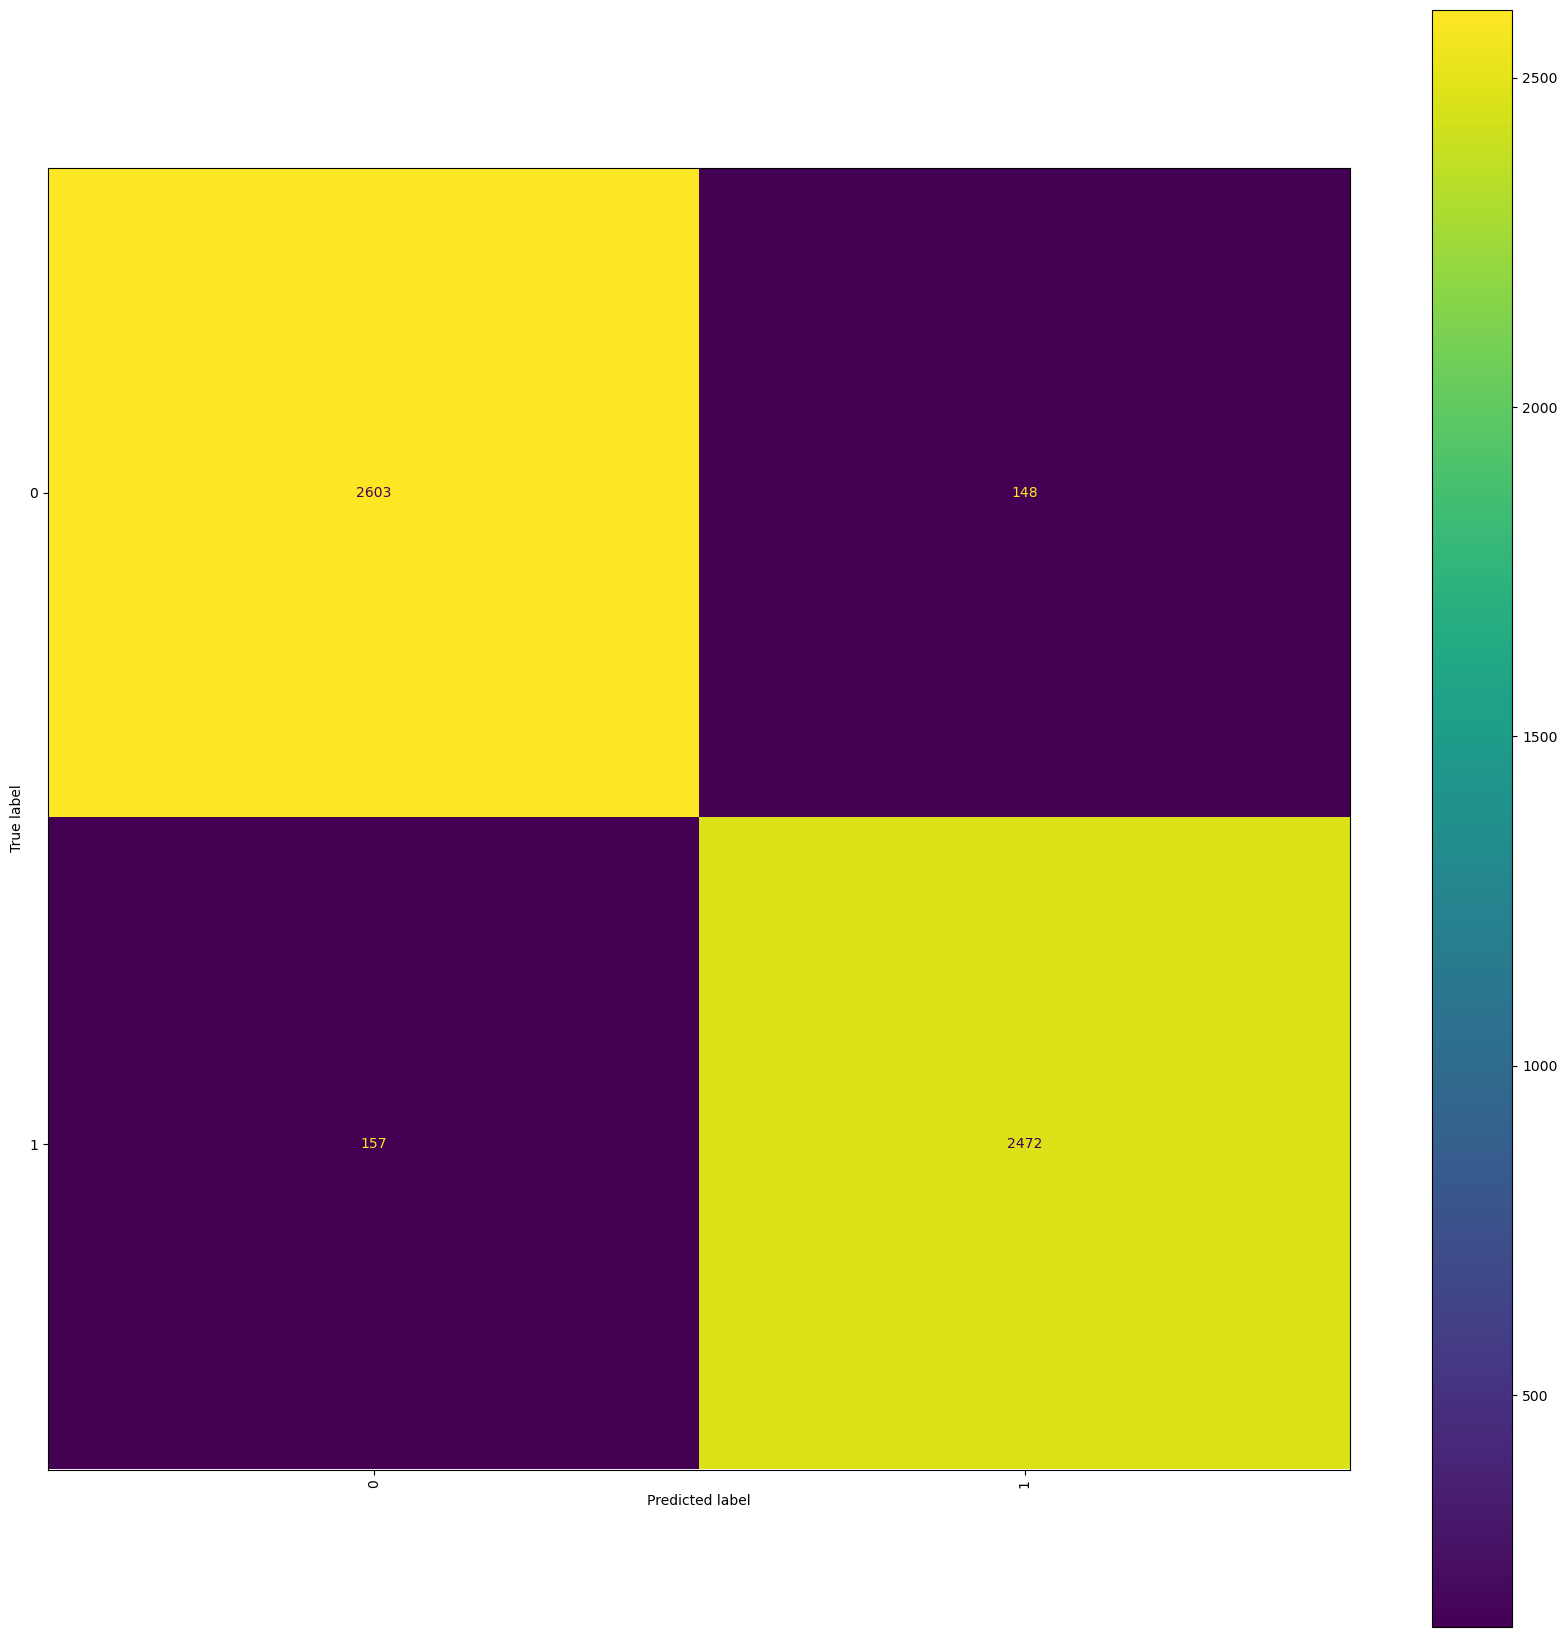

In [55]:

#print(classification_report(y_test, y_pred, target_names=model.classes_))
# Plot the confusion matrix of our results
fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test_transformed, y_test, ax=ax);
plt.xticks(rotation=90);

In [56]:
len(y_test),len(y_pred)

(5380, 5380)

In [57]:
type(y_test),type(y_pred),model.classes_

(pandas.core.series.Series, numpy.ndarray, array([0, 1]))

In [58]:
#Saving a model
with open('model.pkl','wb') as file:
   pickle.dump(model,file)
# Save the TF-IDF vectorizer
with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)
   

In [59]:
# Load the model from file
with open('model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [60]:
loaded_model

MultinomialNB()

In [68]:
random_row = df.sample(n=1)
title = random_row['title'].iloc[0]
description = random_row['text'].iloc[0]
print("Title:", title)
print("Description:", description)
user_input = input("Is this news true or fake? (Enter 'true' or 'fake'): ")
user_input=user_input.lower()
if(user_input=='fake'):
    user_label=0
elif user_input== 'true': 
     user_label=1
else:
    print("Invalid input! Please enter 'true' or 'fake .'")
    exit()
actual_label = random_row['Detection'].iloc[0]  
if user_label==actual_label:
   print("Your input is correct! The news is indeed", actual_label)
else:
    print("Your input is incorrect! The news is actually", actual_label)

Title: Despite recusal, Trump has confidence in Sessions: White House
Description: WASHINGTON (Reuters) - President Donald Trump has confidence in Attorney General Jeff Sessions despite saying in a New York Times interview on Wednesday that he was disappointed in him for recusing himself from an FBI investigation into Russian meddling in the 2016  election, a White House spokeswoman said on Thursday. “As the president said yesterday, he was disappointed in  the Attorney General Sessions’ decision to recuse himself, but clearly he has confidence in him or he would not be the attorney general,” spokeswoman Sarah Sanders told a press briefing. 


KeyError: 'Detection'

In [65]:
df['Dectection']

20485    0
7700     0
9768     1
9165     1
16826    0
        ..
15583    0
18875    1
5370     0
1970     0
8185     1
Name: Dectection, Length: 44898, dtype: int64